In [2]:
# !pip install scikit-learn
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib

# Windows용 한글 폰트 설정 (맑은 고딕)
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 한글폰트 예시

plt.rcParams['axes.unicode_minus'] = True  # 음수 기호 제대로 표시 설정

import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# 데이터 불러오기
df = pd.read_csv('train_subway22.csv')  # 파일 경로에 맞게 수정

# 데이터 상위 5개 행 확인
df.head(10)

,Unnamed: 0,train_subway22.tm,train_subway22.line,train_subway22.station_number,train_subway22.station_name,train_subway22.direction,train_subway22.stn,train_subway22.ta,train_subway22.wd,train_subway22.ws,train_subway22.rn_day,train_subway22.rn_hr1,train_subway22.hm,train_subway22.si,train_subway22.ta_chi,train_subway22.congestion
0,1,2022010100,1,150,서울역,상선,419,-9.4,61.0,3.5,0.0,0.0,34.0,-99.00,-12.8,0
1,2,2022010101,1,150,서울역,상선,419,-9.4,39.4,2.0,0.0,0.0,35.8,-99.00,-10.4,0
2,3,2022010105,1,150,서울역,상선,419,-9.7,350.9,0.9,0.0,0.0,44.5,-99.00,-10.8,2
3,4,2022010106,1,150,서울역,상선,419,-9.4,139.6,0.5,0.0,0.0,43.4,-99.00,-11.0,5
4,5,2022010107,1,150,서울역,상선,419,-10.1,173.6,2.7,0.0,0.0,49.2,-99.00,-10.9,4
5,6,2022010108,1,150,서울역,상선,419,-10.4,165.6,3.1,0.0,0.0,47.0,0.00,-10.7,6
6,7,2022010109,1,150,서울역,상선,419,-10.0,162.7,3.5,0.0,0.0,48.0,0.30,-9.0,8
7,8,2022010110,1,150,서울역,상선,419,-8.8,162.0,2.4,0.0,0.0,41.7,0.84,-6.0,11
8,9,2022010111,1,150,서울역,상선,419,-7.4,167.0,0.9,0.0,0.0,37.5,1.37,-4.1,13
9,10,2022010112,1,150,서울역,상선,419,-5.9,132.8,0.6,0.0,0.0,35.8,1.70,-2.6,17


In [4]:
df.replace(-99, np.nan, inplace=True)
df['train_subway22.wd'] = df['train_subway22.wd'].replace(-9.9, np.nan) # 풍향의 -9.9 결측값도 NaN 처리
df.isnull().sum()


Unnamed: 0                             0
train_subway22.tm                      0
train_subway22.line                    0
train_subway22.station_number          0
train_subway22.station_name            0
train_subway22.direction               0
train_subway22.stn                     0
train_subway22.ta                  37922
train_subway22.wd                  60876
train_subway22.ws                  49768
train_subway22.rn_day              85970
train_subway22.rn_hr1              89830
train_subway22.hm                  42860
train_subway22.si                2010112
train_subway22.ta_chi                314
train_subway22.congestion              0
dtype: int64

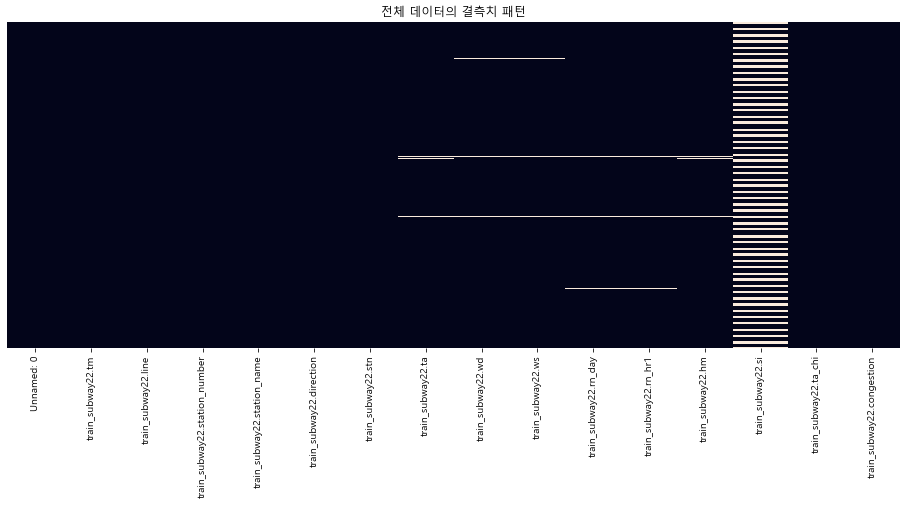

In [7]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title('전체 데이터의 결측치 패턴')
plt.show()

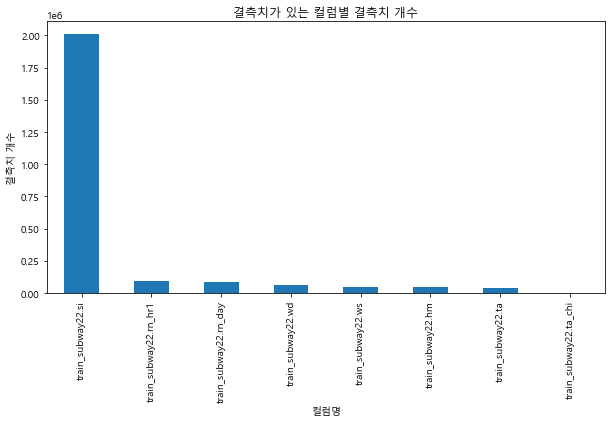

In [6]:
# 컬럼별 결측치 개수
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)  # 결측치 1개 이상만

plt.figure(figsize=(10, 5))
missing.plot(kind='bar')
plt.title('결측치가 있는 컬럼별 결측치 개수')
plt.ylabel('결측치 개수')
plt.xlabel('컬럼명')
plt.show()


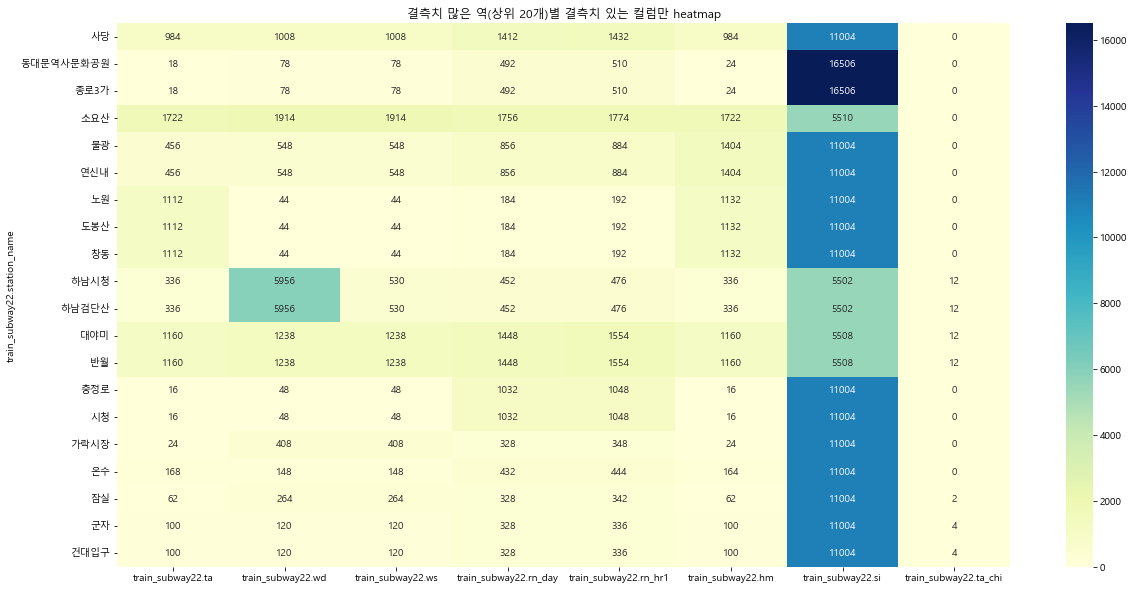

In [8]:
# 1. 상위 20개 역의 결측치 DataFrame
missing_by_station_col = df.groupby('train_subway22.station_name').apply(lambda x: x.isnull().sum())
top_stations = missing_by_station_col.sum(axis=1).sort_values(ascending=False).head(20).index
top20_missing_df = missing_by_station_col.loc[top_stations]

# 2. 결측치가 1개라도 있는 컬럼만 추출
cols_with_missing = top20_missing_df.sum(axis=0) > 0
top20_missing_df = top20_missing_df.loc[:, cols_with_missing]

# 3. 시각화
plt.figure(figsize=(20, 10))
sns.heatmap(top20_missing_df, annot=True, fmt="d", cmap="YlGnBu")
plt.title('결측치 많은 역(상위 20개)별 결측치 있는 컬럼만 heatmap')
plt.show()

In [3]:
# datetime + weekday
df['datetime'] = pd.to_datetime(df['train_subway22.tm'].astype(str), format='%Y%m%d%H')
df = df.set_index('datetime') # df = df.reset_index()으로 초기화

df['train_subway22.datetime'] = pd.to_datetime(df['train_subway22.tm'], format='%Y%m%d%H')
df['weekday'] = df['train_subway22.datetime'].dt.weekday
df['train_subway22.is_weekday'] = df['weekday'].apply(lambda x: 1 if x < 5 else 0)

In [4]:
# train_subway22.rush_hour 생성
# 1. 정수형을 문자열로 변환
df['train_subway22.tm'] = df['train_subway22.tm'].astype(str)

# 2. 문자열에서 연, 월, 일, 시 분리
df['year'] = df['train_subway22.tm'].str[:4].astype('int64')
df['month'] = df['train_subway22.tm'].str[4:6].astype('int64')
df['day'] = df['train_subway22.tm'].str[6:8].astype('int64')
df['hour'] = df['train_subway22.tm'].str[8:10].astype('int64')

# 출퇴근 시간: 07, 08, 09, 17, 18, 19 → 1 / 나머지 → 0
df['train_subway22.rush_hour'] = df['hour'].apply(lambda x: 1 if x in [7, 8, 9, 17, 18, 19] else 0)

In [5]:
from sklearn.preprocessing import LabelEncoder
# 역이름 label encoding
le = LabelEncoder()
df['train_subway22.station_name_encoded'] = le.fit_transform(df['train_subway22.station_name'])

In [6]:
# 방법 1: map 활용 (가장 간단)
direction_map = {'내선': 0, '상선': 0, '외선': 1, '하선': 1}
df['train_subway22.direction_bin'] = df['train_subway22.direction'].map(direction_map)

In [7]:
# 조건에 해당하는 컬럼만 필터링
cols_with_minus_99 = df.columns[(df == -99).any()]
print("다음 컬럼에 -99가 포함되어 있음:")
print(cols_with_minus_99.tolist())

다음 컬럼에 -99가 포함되어 있음:
['train_subway22.ta', 'train_subway22.wd', 'train_subway22.ws', 'train_subway22.rn_day', 'train_subway22.rn_hr1', 'train_subway22.hm', 'train_subway22.si', 'train_subway22.ta_chi']


In [8]:
df.replace(-99, np.nan, inplace=True)
df['train_subway22.wd'] = df['train_subway22.wd'].replace(-9.9, np.nan) # 풍향의 -9.9 결측값도 NaN 처리
df.isnull().sum()


Unnamed: 0                                   0
train_subway22.tm                            0
train_subway22.line                          0
train_subway22.station_number                0
train_subway22.station_name                  0
train_subway22.direction                     0
train_subway22.stn                           0
train_subway22.ta                        37922
train_subway22.wd                        60876
train_subway22.ws                        49768
train_subway22.rn_day                    85970
train_subway22.rn_hr1                    89830
train_subway22.hm                        42860
train_subway22.si                      2010112
train_subway22.ta_chi                      314
train_subway22.congestion                    0
train_subway22.datetime                      0
weekday                                      0
train_subway22.is_weekday                    0
year                                         0
month                                        0
day          

In [9]:
# datetime 인덱스에서 '시(hour)' 추출
target_hours = [21, 22, 23, 0, 1, 5]

# 4~8월은 주간 06~20시
df.loc[df.index.hour.isin(target_hours), 'train_subway22.si'] = 0

month = df.index.month
hour = df.index.hour

# 3, 9, 10월은 주간 07~19시
cond1 = (month.isin([3, 9, 10])) & (hour.isin([6, 20]))
df.loc[cond1, 'train_subway22.si'] = 0

# 1, 2, 11, 12월은 주간 08~18시
cond2 = (month.isin([1, 2, 11, 12])) & (hour.isin([6, 7, 19, 20]))
df.loc[cond2, 'train_subway22.si'] = 0

df.head(40)

,Unnamed: 0,train_subway22.tm,train_subway22.line,train_subway22.station_number,train_subway22.station_name,train_subway22.direction,train_subway22.stn,train_subway22.ta,train_subway22.wd,train_subway22.ws,...,train_subway22.datetime,weekday,train_subway22.is_weekday,year,month,day,hour,train_subway22.rush_hour,train_subway22.station_name_encoded,train_subway22.direction_bin
datetime,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,1,2022010100,1,150,서울역,상선,419,-9.4,61.0,3.5,...,2022-01-01 00:00:00,5,0,2022,1,1,0,0,163,0
2022-01-01 01:00:00,2,2022010101,1,150,서울역,상선,419,-9.4,39.4,2.0,...,2022-01-01 01:00:00,5,0,2022,1,1,1,0,163,0
2022-01-01 05:00:00,3,2022010105,1,150,서울역,상선,419,-9.7,350.9,0.9,...,2022-01-01 05:00:00,5,0,2022,1,1,5,0,163,0
2022-01-01 06:00:00,4,2022010106,1,150,서울역,상선,419,-9.4,139.6,0.5,...,2022-01-01 06:00:00,5,0,2022,1,1,6,0,163,0
2022-01-01 07:00:00,5,2022010107,1,150,서울역,상선,419,-10.1,173.6,2.7,...,2022-01-01 07:00:00,5,0,2022,1,1,7,1,163,0
2022-01-01 08:00:00,6,2022010108,1,150,서울역,상선,419,-10.4,165.6,3.1,...,2022-01-01 08:00:00,5,0,2022,1,1,8,1,163,0
2022-01-01 09:00:00,7,2022010109,1,150,서울역,상선,419,-10.0,162.7,3.5,...,2022-01-01 09:00:00,5,0,2022,1,1,9,1,163,0
2022-01-01 10:00:00,8,2022010110,1,150,서울역,상선,419,-8.8,162.0,2.4,...,2022-01-01 10:00:00,5,0,2022,1,1,10,0,163,0
2022-01-01 11:00:00,9,2022010111,1,150,서울역,상선,419,-7.4,167.0,0.9,...,2022-01-01 11:00:00,5,0,2022,1,1,11,0,163,0


In [10]:
df.isnull().sum()

Unnamed: 0                                 0
train_subway22.tm                          0
train_subway22.line                        0
train_subway22.station_number              0
train_subway22.station_name                0
train_subway22.direction                   0
train_subway22.stn                         0
train_subway22.ta                      37922
train_subway22.wd                      60876
train_subway22.ws                      49768
train_subway22.rn_day                  85970
train_subway22.rn_hr1                  89830
train_subway22.hm                      42860
train_subway22.si                      35636
train_subway22.ta_chi                    314
train_subway22.congestion                  0
train_subway22.datetime                    0
weekday                                    0
train_subway22.is_weekday                  0
year                                       0
month                                      0
day                                        0
hour      

In [11]:
# 일조량: 10 시간 동안의 이동평균으로 보간
df['train_subway22.si'] = df['train_subway22.si'].fillna(
    df['train_subway22.si'].rolling(window=10, center=True, min_periods=1).mean()
)

In [12]:
# 온도: 6시간 동안의 이동평균으로 보간
df['train_subway22.ta'] = df['train_subway22.ta'].fillna(
    df['train_subway22.ta'].rolling(window=6, center=True, min_periods=1).mean()
)

In [13]:
# 체감온도: 6시간 동안의 이동평균으로 보간
df['train_subway22.ta_chi'] = df['train_subway22.ta_chi'].fillna(
    df['train_subway22.ta_chi'].rolling(window=6, center=True, min_periods=1).mean()
)

In [14]:
# 일 강수량: 24시간 동안의 이동평균으로 보간
df['train_subway22.rn_day'] = df['train_subway22.rn_day'].fillna(
    df['train_subway22.rn_day'].rolling(window=24, center=True, min_periods=1).mean()
)

In [15]:
# 1h 강수량: 3시간 동안의 이동평균으로 보간
df['train_subway22.rn_hr1'] = df['train_subway22.rn_hr1'].fillna(
    df['train_subway22.rn_hr1'].rolling(window=3, center=True, min_periods=1).mean()
)

In [16]:
# 풍향: 6시간 동안의 이동평균으로 보간
# 그 전에 각도 -> 라디안 -> 벡터 변환

# 풍향을 라디안으로 변환
radians = np.deg2rad(df['train_subway22.wd'])

# 각도 → 벡터 분해
df['sin'] = np.sin(radians)
df['cos'] = np.cos(radians)

# 이동 평균
df['sin_avg'] = df['sin'].rolling(window=6, min_periods=1, center=True).mean()
df['cos_avg'] = df['cos'].rolling(window=6, min_periods=1, center=True).mean()

# 벡터 평균 → 다시 각도로 환산
df['train_subway22.wd'] = (np.arctan2(df['sin_avg'], df['cos_avg']) * 180 / np.pi) % 360

df=df.drop(columns=['sin','cos','sin_avg','cos_avg'])
df.head()

,Unnamed: 0,train_subway22.tm,train_subway22.line,train_subway22.station_number,train_subway22.station_name,train_subway22.direction,train_subway22.stn,train_subway22.ta,train_subway22.wd,train_subway22.ws,...,train_subway22.datetime,weekday,train_subway22.is_weekday,year,month,day,hour,train_subway22.rush_hour,train_subway22.station_name_encoded,train_subway22.direction_bin
datetime,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,1,2022010100,1,150,서울역,상선,419,-9.4,31.042846,3.5,...,2022-01-01 00:00:00,5,0,2022,1,1,0,0,163,0
2022-01-01 01:00:00,2,2022010101,1,150,서울역,상선,419,-9.4,53.425894,2.0,...,2022-01-01 01:00:00,5,0,2022,1,1,1,0,163,0
2022-01-01 05:00:00,3,2022010105,1,150,서울역,상선,419,-9.7,76.939748,0.9,...,2022-01-01 05:00:00,5,0,2022,1,1,5,0,163,0
2022-01-01 06:00:00,4,2022010106,1,150,서울역,상선,419,-9.4,101.474175,0.5,...,2022-01-01 06:00:00,5,0,2022,1,1,6,0,163,0
2022-01-01 07:00:00,5,2022010107,1,150,서울역,상선,419,-10.1,137.108924,2.7,...,2022-01-01 07:00:00,5,0,2022,1,1,7,1,163,0


In [17]:
# 풍속: 6시간 동안의 이동평균으로 보간
df['train_subway22.ws'] = df['train_subway22.ws'].fillna(
    df['train_subway22.ws'].rolling(window=6, center=True, min_periods=1).mean()
)

In [18]:
# 습도: 6시간 동안의 이동평균으로 보간
df['train_subway22.hm'] = df['train_subway22.hm'].fillna(
    df['train_subway22.hm'].rolling(window=6, center=True, min_periods=1).mean()
)

In [19]:
df.isnull().sum()

Unnamed: 0                                 0
train_subway22.tm                          0
train_subway22.line                        0
train_subway22.station_number              0
train_subway22.station_name                0
train_subway22.direction                   0
train_subway22.stn                         0
train_subway22.ta                      26914
train_subway22.wd                      34172
train_subway22.ws                      23202
train_subway22.rn_day                  13486
train_subway22.rn_hr1                  75170
train_subway22.hm                      31304
train_subway22.si                        420
train_subway22.ta_chi                      0
train_subway22.congestion                  0
train_subway22.datetime                    0
weekday                                    0
train_subway22.is_weekday                  0
year                                       0
month                                      0
day                                        0
hour      

In [20]:
# 월별 이동평균
df['month'] = df.index.to_period('M')
monthly_mean = df.groupby('month')['train_subway22.ta'].transform('mean')
df['monthly_mean'] = monthly_mean
df['train_subway22.ta'] = df['train_subway22.ta'].fillna(df['monthly_mean'])
df.isnull().sum()

Unnamed: 0                                 0
train_subway22.tm                          0
train_subway22.line                        0
train_subway22.station_number              0
train_subway22.station_name                0
train_subway22.direction                   0
train_subway22.stn                         0
train_subway22.ta                          0
train_subway22.wd                      34172
train_subway22.ws                      23202
train_subway22.rn_day                  13486
train_subway22.rn_hr1                  75170
train_subway22.hm                      31304
train_subway22.si                        420
train_subway22.ta_chi                      0
train_subway22.congestion                  0
train_subway22.datetime                    0
weekday                                    0
train_subway22.is_weekday                  0
year                                       0
month                                      0
day                                        0
hour      

In [21]:
# 풍향
monthly_mean = df.groupby('month')['train_subway22.wd'].transform('mean')
df['monthly_mean'] = monthly_mean
df['train_subway22.wd'] = df['train_subway22.wd'].fillna(df['monthly_mean'])
df.isnull().sum()

Unnamed: 0                                 0
train_subway22.tm                          0
train_subway22.line                        0
train_subway22.station_number              0
train_subway22.station_name                0
train_subway22.direction                   0
train_subway22.stn                         0
train_subway22.ta                          0
train_subway22.wd                          0
train_subway22.ws                      23202
train_subway22.rn_day                  13486
train_subway22.rn_hr1                  75170
train_subway22.hm                      31304
train_subway22.si                        420
train_subway22.ta_chi                      0
train_subway22.congestion                  0
train_subway22.datetime                    0
weekday                                    0
train_subway22.is_weekday                  0
year                                       0
month                                      0
day                                        0
hour      

In [22]:
# 풍속
monthly_mean = df.groupby('month')['train_subway22.ws'].transform('mean')
df['monthly_mean'] = monthly_mean
df['train_subway22.ws'] = df['train_subway22.ws'].fillna(df['monthly_mean'])
df.isnull().sum()

Unnamed: 0                                 0
train_subway22.tm                          0
train_subway22.line                        0
train_subway22.station_number              0
train_subway22.station_name                0
train_subway22.direction                   0
train_subway22.stn                         0
train_subway22.ta                          0
train_subway22.wd                          0
train_subway22.ws                          0
train_subway22.rn_day                  13486
train_subway22.rn_hr1                  75170
train_subway22.hm                      31304
train_subway22.si                        420
train_subway22.ta_chi                      0
train_subway22.congestion                  0
train_subway22.datetime                    0
weekday                                    0
train_subway22.is_weekday                  0
year                                       0
month                                      0
day                                        0
hour      

In [23]:
# 일 강수량
monthly_mean = df.groupby('month')['train_subway22.rn_day'].transform('mean')
df['monthly_mean'] = monthly_mean
df['train_subway22.rn_day'] = df['train_subway22.rn_day'].fillna(df['monthly_mean'])
df.isnull().sum()

Unnamed: 0                                 0
train_subway22.tm                          0
train_subway22.line                        0
train_subway22.station_number              0
train_subway22.station_name                0
train_subway22.direction                   0
train_subway22.stn                         0
train_subway22.ta                          0
train_subway22.wd                          0
train_subway22.ws                          0
train_subway22.rn_day                      0
train_subway22.rn_hr1                  75170
train_subway22.hm                      31304
train_subway22.si                        420
train_subway22.ta_chi                      0
train_subway22.congestion                  0
train_subway22.datetime                    0
weekday                                    0
train_subway22.is_weekday                  0
year                                       0
month                                      0
day                                        0
hour      

In [24]:
# 1시간 강수량
monthly_mean = df.groupby('month')['train_subway22.rn_hr1'].transform('mean')
df['monthly_mean'] = monthly_mean
df['train_subway22.rn_hr1'] = df['train_subway22.rn_hr1'].fillna(df['monthly_mean'])
df.isnull().sum()

Unnamed: 0                                 0
train_subway22.tm                          0
train_subway22.line                        0
train_subway22.station_number              0
train_subway22.station_name                0
train_subway22.direction                   0
train_subway22.stn                         0
train_subway22.ta                          0
train_subway22.wd                          0
train_subway22.ws                          0
train_subway22.rn_day                      0
train_subway22.rn_hr1                      0
train_subway22.hm                      31304
train_subway22.si                        420
train_subway22.ta_chi                      0
train_subway22.congestion                  0
train_subway22.datetime                    0
weekday                                    0
train_subway22.is_weekday                  0
year                                       0
month                                      0
day                                        0
hour      

In [25]:
# 습도
monthly_mean = df.groupby('month')['train_subway22.hm'].transform('mean')
df['monthly_mean'] = monthly_mean
df['train_subway22.hm'] = df['train_subway22.hm'].fillna(df['monthly_mean'])
df.isnull().sum()

Unnamed: 0                               0
train_subway22.tm                        0
train_subway22.line                      0
train_subway22.station_number            0
train_subway22.station_name              0
train_subway22.direction                 0
train_subway22.stn                       0
train_subway22.ta                        0
train_subway22.wd                        0
train_subway22.ws                        0
train_subway22.rn_day                    0
train_subway22.rn_hr1                    0
train_subway22.hm                        0
train_subway22.si                      420
train_subway22.ta_chi                    0
train_subway22.congestion                0
train_subway22.datetime                  0
weekday                                  0
train_subway22.is_weekday                0
year                                     0
month                                    0
day                                      0
hour                                     0
train_subwa

In [26]:
# 일조량
monthly_mean = df.groupby('month')['train_subway22.si'].transform('mean')
df['monthly_mean'] = monthly_mean
df['train_subway22.si'] = df['train_subway22.si'].fillna(df['monthly_mean'])
df.isnull().sum()

Unnamed: 0                             0
train_subway22.tm                      0
train_subway22.line                    0
train_subway22.station_number          0
train_subway22.station_name            0
train_subway22.direction               0
train_subway22.stn                     0
train_subway22.ta                      0
train_subway22.wd                      0
train_subway22.ws                      0
train_subway22.rn_day                  0
train_subway22.rn_hr1                  0
train_subway22.hm                      0
train_subway22.si                      0
train_subway22.ta_chi                  0
train_subway22.congestion              0
train_subway22.datetime                0
weekday                                0
train_subway22.is_weekday              0
year                                   0
month                                  0
day                                    0
hour                                   0
train_subway22.rush_hour               0
train_subway22.s

In [27]:
df=df.drop(columns='monthly_mean')

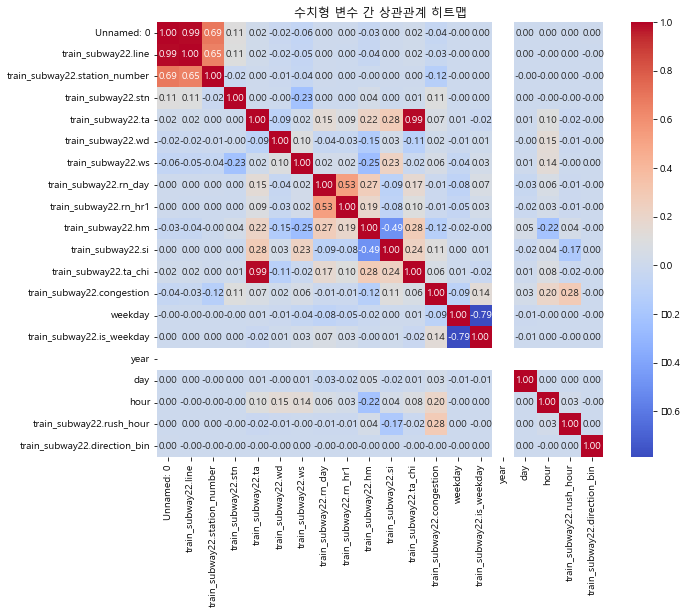

In [28]:
# 수치형 변수 간 상관관계 히트맵
df_numeric = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("수치형 변수 간 상관관계 히트맵")
plt.show()

In [30]:
df.to_csv('train_subway22_mov.csv', index=True, encoding='utf-8')